In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Police_racial_equity/fatal_encounters_dot_org.csv')

# Copying the dataframe into new Dataframe.


In [ ]:
df_copy = df.copy(deep=True)
# Copying the original dataframe in a new dataframe to keep the orginal intact
# The reson for doing this is sometimes we encounter an error if we make changes in the original dataframe.

In [ ]:
df_copy

,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),Location of death (city),Location of death (state),Location of death (zip code),Location of death (county),Full Address,Latitude,Longitude,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
0,25746.0,Samuel H. Knapp,17,Male,European-American/White,European-American/White,Not imputed,NaN,1/1/2000,27898-27804 US-101,Willits,CA,95490.0,Mendocino,27898-27804 US-101 Willits CA 95490 Mendocino,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Samuel Knapp was allegedly driving a stolen ve...,Unreported,Pursuit,https://drive.google.com/file/d/10DisrV8K5ReP1...,No,NaN,1/1/2000: Samuel Knapp was allegedly driving a...,NaN,25746.0,2000
1,25747.0,Mark A. Horton,21,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25747.0,2000
2,25748.0,Phillip A. Blurbridge,19,Male,African-American/Black,African-American/Black,Not imputed,NaN,1/1/2000,Davison Freeway,Detroit,MI,48203.0,Wayne,Davison Freeway Detroit MI 48203 Wayne,42.404526,-83.092274,NaN,Vehicle,Two Detroit men killed when their car crashed ...,Unreported,Pursuit,https://drive.google.com/file/d/1-nK-RohgiM-tZ...,No,NaN,1/1/2000: Two Detroit men killed when their ca...,NaN,25748.0,2000
3,25749.0,Mark Ortiz,23,Male,Hispanic/Latino,Hispanic/Latino,Not imputed,NaN,1/1/2000,600 W Cherry Ln,Carlsbad,NM,88220.0,Eddy,600 W Cherry Ln Carlsbad NM 88220 Eddy,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,A motorcycle was allegedly being driven errati...,Unreported,Pursuit,https://drive.google.com/file/d/1qAEefRjX_aTtC...,No,NaN,1/1/2000: A motorcycle was allegedly being dri...,NaN,25749.0,2000
4,1.0,LaTanya Janelle McCoy,24,Female,African-American/Black,African-American/Black,Not imputed,NaN,1/2/2000,5700 block Mack Road,Sacramento,CA,95823.0,Sacramento,5700 block Mack Road Sacramento CA 95823 Sacra...,38.473949,-121.433776,Sacramento Police Department,Vehicle,LaTanya Janelle McCoy's car was struck from be...,Unknown,Pursuit,http://www.recordnet.com/article/20000110/A_NE...,No,NaN,1/2/2000: LaTanya Janelle McCoy's car was stru...,NaN,1.0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,28619.0,Maksim Aleksandrovich Krechetov,44,Male,European-American/White,European-American/White,Not imputed,NaN,8/17/2020,600 block NE. 120th Avenue,Blaine,MN,55434.0,Anoka,600 block NE. 120th Avenue Blaine MN 55434 Anoka,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Suicide,Suicide,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandrovich Krechetov, 44...",NaN,28619.0,2020
28599,28620.0,Yulia Khort,47,Female,European-American/White,European-American/White,Not imputed,https://fatalencounters.org/wp-content/uploads...,8/17/2020,600 block NE. 120th Avenue,Blaine,MN,55434.0,Anoka,600 block NE. 120th Avenue Blaine MN 55434 Anoka,45.188123,-93.254570,Anoka County Sheriff's Office,Gunshot,"Maksim Aleksandrovich Krechetov, 44, allegedly...",Murder/suicide,No,https://www.startribune.com/after-standoff-aut...,No,NaN,"8/17/2020: Maksim Aleksandr

# Data Cleaning(Deleting the unnecessary attributes)

Deleting the unnecessary attributes and changing the data types of rows for whichever is necessary

In [ ]:
df_copy=df_copy.drop(['Unique ID'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Subject\'s name'],axis=1);

In [ ]:
df_copy=df_copy.drop(['URL of image of deceased'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Location of injury (address)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Location of death (zip code)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Full Address'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Agency responsible for death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['A brief description of the circumstances surrounding the death'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Link to news article or photo of official document'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Video'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Date&Description'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Unique ID formula'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Unique identifier (redundant)'],axis=1);

In [ ]:
df_copy=df_copy.drop(['Subject\'s race'],axis=1);

In [ ]:
df_copy

,Subject's age,Subject's gender,Subject's race with imputations,Imputation probability,Date of injury resulting in death (month/day/year),Location of death (city),Location of death (state),Location of death (county),Latitude,Longitude,Cause of death,Intentional Use of Force (Developing),"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Date (Year)
0,17,Male,European-American/White,Not imputed,1/1/2000,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000
1,21,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000
2,19,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000
3,23,Male,Hispanic/Latino,Not imputed,1/1/2000,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000
4,24,Female,African-American/Black,Not imputed,1/2/2000,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,44,Male,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020
28599,47,Female,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020
28600,14,Male,African-American/Black,Not imputed,8/18/2020,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020
28601,33,Male,European-American/White,Not imputed,8/18/2020,Bon Aqua,TN,Hickman,35.955288,-87.343450,Drowned,No,No,2020


# Age Replacement

In [ ]:
df_copy['Subject\'s age'] = df_copy['Subject\'s age'].str.strip('s')

In [ ]:
df_copy['Subject\'s age'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
28598    False
28599    False
28600    False
28601    False
28602     True
Name: Subject's age, Length: 28603, dtype: bool

In [ ]:
sum(df_copy['Subject\'s age'].isnull() == True)

1014

In [ ]:
df_copy = df_copy.rename({'Subject\'s age': 'age', 'Subject\'s gender': 'gender', 'Subject\'s race with imputations': 'race', 'Imputation probability': 'imp_prob', 'Date of injury resulting in death (month/day/year)': 'date', 'Location of death (city)': 'city', 'Location of death (state)': 'state', 'Location of death (county)':'county','Cause of death': 'cause', 'Date (Year)': 'year', 'Intentional Use of Force (Developing)':'force_used', 'Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS':'mental_illness' },axis=1)

In [ ]:
df_copy['mean_age'] = df_copy['age']

In [ ]:
df_copy['age'] = pd.to_numeric(df_copy.age)

In [ ]:
df_copy = df_copy.rename({'Subject\'s new age mean': 'mean_age'},axis=1)

In [ ]:
df_copy['mean_age']

0         17
1         21
2         19
3         23
4         24
        ... 
28598     44
28599     47
28600     14
28601     33
28602    NaN
Name: mean_age, Length: 28603, dtype: object

In [ ]:
df_copy['mean_age'] = pd.to_numeric(df_copy.mean_age)

In [ ]:
df_copy['mean_age'].fillna(df_copy['age'].mean(), inplace=True)

In [ ]:
df_copy['mean_age'].isnull().sum()

0

In [ ]:
df_copy.dtypes

age               float64
gender             object
race               object
imp_prob           object
date               object
city               object
state              object
county             object
Latitude          float64
Longitude         float64
cause              object
force_used         object
mental_illness     object
year                int64
mean_age          float64
dtype: object

In [ ]:
df_copy

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age
0,17.0,Male,European-American/White,Not imputed,1/1/2000,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.00000
1,21.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.00000
2,19.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.00000
3,23.0,Male,Hispanic/Latino,Not imputed,1/1/2000,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.00000
4,24.0,Female,African-American/Black,Not imputed,1/2/2000,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,44.0,Male,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020,44.00000
28599,47.0,Female,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020,47.00000
28600,14.0,Male,African-American/Black,Not imputed,8/18/2020,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020,14.00000
28601,33.0,Male,European-American/White,Not imputed,8/18/2020,Bon Aqua,TN,Hickman,35.955288,-87.343450,Drowned,No,No,2020,33.00000


# Chekcking Correlation betweeen Attributes

In [ ]:
correlation = df_copy.corr()
# Checking for correaltion to see if any kind of prediction is viable for our dataset or not

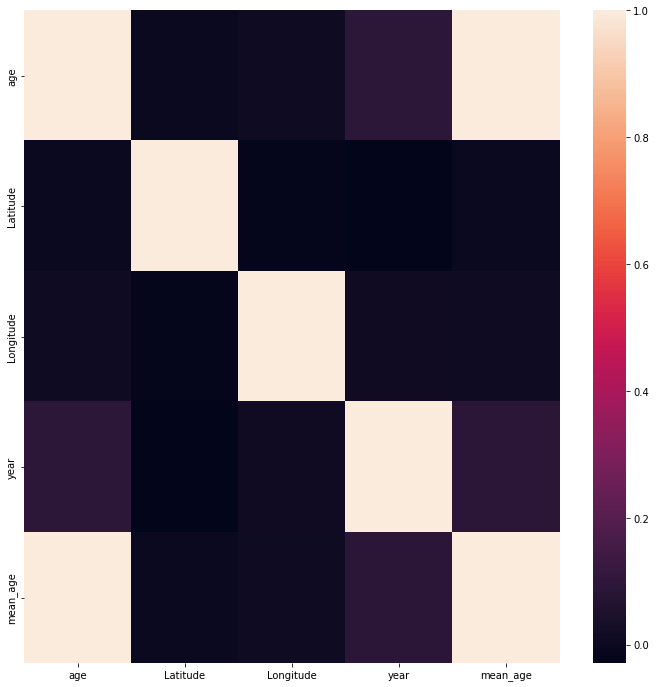

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation)
plt.show()

Form the above figure we can say that not a single feature is closely realted. Obviously mean age and age will be closely related because we derived mean age from the age attribute, but other than that nothing seems to be correlated. So after braistorming a lot we came to a conclusion that as we alsready have the dates available from the year 2000 to 2020 i.e dates for 20 years why not we just forecast the number of kills that might be done using time series analysis.

# Preporcessing for Time series analysis 

In [ ]:
df_copy

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age
0,17.0,Male,European-American/White,Not imputed,1/1/2000,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.00000
1,21.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.00000
2,19.0,Male,African-American/Black,Not imputed,1/1/2000,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.00000
3,23.0,Male,Hispanic/Latino,Not imputed,1/1/2000,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.00000
4,24.0,Female,African-American/Black,Not imputed,1/2/2000,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28598,44.0,Male,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020,44.00000
28599,47.0,Female,European-American/White,Not imputed,8/17/2020,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020,47.00000
28600,14.0,Male,African-American/Black,Not imputed,8/18/2020,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020,14.00000
28601,33.0,Male,European-American/White,Not imputed,8/18/2020,Bon Aqua,TN,Hickman,35.955288,-87.343450,Drowned,No,No,2020,33.00000


In [ ]:
import datetime

In [ ]:
df_copy.dtypes

age               float64
gender             object
race               object
imp_prob           object
date               object
city               object
state              object
county             object
Latitude          float64
Longitude         float64
cause              object
force_used         object
mental_illness     object
year                int64
mean_age          float64
dtype: object

In [ ]:
df_copy['year'].value_counts()

# Checking the value counts of each year and also looking for nay outlies if we find anything.

2018    1852
2019    1812
2013    1782
2017    1767
2014    1717
2015    1606
2016    1597
2012    1486
2011    1407
2010    1291
2020    1290
2006    1266
2009    1257
2007    1253
2008    1210
2005    1169
2003    1052
2004    1036
2002     981
2001     923
2000     848
2100       1
Name: year, dtype: int64

Here we can see that there is also a value of year 2100 which is impossible so it is considered as noice. SO we will remove it.

In [ ]:
df_copy.drop(df.index[df_copy['year'] == 2100], inplace=True)

In [ ]:
df_copy['year'].value_counts()

2018    1852
2019    1812
2013    1782
2017    1767
2014    1717
2015    1606
2016    1597
2012    1486
2011    1407
2010    1291
2020    1290
2006    1266
2009    1257
2007    1253
2008    1210
2005    1169
2003    1052
2004    1036
2002     981
2001     923
2000     848
Name: year, dtype: int64

In [ ]:
df_copy['date'] = pd.to_datetime(df_copy['date'])
# For performing time series analysis we need to convert the data to date time format and we are doing exactly that

In [ ]:
df_copy.dtypes

age                      float64
gender                    object
race                      object
imp_prob                  object
date              datetime64[ns]
city                      object
state                     object
county                    object
Latitude                 float64
Longitude                float64
cause                     object
force_used                object
mental_illness            object
year                       int64
mean_age                 float64
dtype: object

# Getting a new Dataframe with Monthly Kills for TSA

Now we do have the dates available for 20 years but we have to make our own dtaset out of it.

First we have to convert the date which is availabe in such a way that we get monthly kills.

Second we need to make sure that the dates are index values not a seperate column in a dataframe. Because for performing Time series analysis we need dates as index values and also in date time format.

# Getting the required DataFrame

This is the first approach used for converting the data we have to get the monthly kills.

In [ ]:
df_copy['month_year'] = df_copy['date'].dt.to_period('M')
# Making a column named month_year which will have the date in yy/mm format

In [ ]:
df_copy['month_year'].value_counts()
# Getting the value counts just to see if we did it correctly or not

2020-05    212
2020-01    186
2017-01    179
2015-07    177
2018-08    174
          ... 
2000-02     65
2000-06     64
2000-11     57
2001-11     57
2000-12     49
Freq: M, Name: month_year, Length: 248, dtype: int64

In [ ]:
monthly_df = pd.DataFrame(df_copy['month_year'].value_counts())
# Here we are making a new dataframe named monthly_df in such a way that the value counts of each of the following will be stores in the monthly_df dataframe

In [ ]:
monthly_df.dtypes
#Checking the datatype of the monthly_df dataframe 
# Here we see that the attribute month_year is not in datetime format. It is in int64 format, so we need to convert it to datetime format

month_year    int64
dtype: object

In [ ]:
monthly_df
# After seeing the dataframe of monthly_df we see that we just get one attribute for month_year but we want 2 attributes.
# And it is also not possible to convert the value of the month_year to dataetime because we got the values using the period. So we have no other option..
# .. but to think of a possible way to split the dataframe and then covert it in the required format for Time Series Analysis.

,month_year
2020-05,212
2020-01,186
2017-01,179
2015-07,177
2018-08,174
...,...
2000-02,65
2000-06,64
2000-11,57
2001-11,57


# Dividing the Dataframe and then Getting the required Dataframe for TSA

In [ ]:
monthlydf_value_counts = monthly_df.reset_index() # First I am resetting the index in case the values of index has changed earlier due to some imputations
monthlydf_value_counts.columns = ['Months', 'Kills'] # Getting the Months and Kills as seperate columns
monthlydf_value_counts

,Months,Kills
0,2020-05,212
1,2020-01,186
2,2017-01,179
3,2015-07,177
4,2018-08,174
...,...,...
243,2000-02,65
244,2000-06,64
245,2000-11,57
246,2001-11,57


As I said earlier we need the column of date to be in datetime format. So for that first we have to impute the value of dd in each row because we have yy/mm already in the column. As our prediciton will be monthly,so we will impute a constant value of 01 in every row. Just to make sure that we can convert it successfully to datetime format.

In [ ]:
monthlydf_value_counts['Months'] = monthlydf_value_counts['Months'].dt.strftime('%Y-%m').add('-01')
# The code for what I explained above is in this block

In [ ]:
monthlydf_value_counts

,Months,Kills
0,2020-05-01,212
1,2020-01-01,186
2,2017-01-01,179
3,2015-07-01,177
4,2018-08-01,174
...,...,...
243,2000-02-01,65
244,2000-06-01,64
245,2000-11-01,57
246,2001-11-01,57


In [ ]:
monthlydf_value_counts.dtypes
# Checking the datatype of the date columns. As the datatype is object we need to convert it too datetime.

Months    object
Kills      int64
dtype: object

In [ ]:
monthlydf_value_counts['Months'] = pd.to_datetime(monthlydf_value_counts['Months'])
# Now I am converting the date attribute to datetime format.

In [ ]:
monthlydf_value_counts.dtypes
# Checking if it was successfully converted. And it seems that it was converted

Months    datetime64[ns]
Kills              int64
dtype: object

In [ ]:
monthlydf_value_counts = monthlydf_value_counts.sort_values(by='Months')
# The dates were not sorted. By this I mean that the dates should be sorted for past to present i.e from 2000 to 2020. This code block is ensuring that

In [ ]:
monthlydf_value_counts
# checking the dataframe after sorting the dates by Months column

,Months,Kills
220,2000-01-01,79
243,2000-02-01,65
230,2000-03-01,76
239,2000-04-01,69
241,2000-05-01,66
...,...,...
19,2020-04-01,162
0,2020-05-01,212
18,2020-06-01,163
33,2020-07-01,153


In [ ]:
monthlydf_value_counts.reset_index()
# Again resetting the index values because it was changed during sorting the dates by Months.

,index,Months,Kills
0,220,2000-01-01,79
1,243,2000-02-01,65
2,230,2000-03-01,76
3,239,2000-04-01,69
4,241,2000-05-01,66
...,...,...,...
243,19,2020-04-01,162
244,0,2020-05-01,212
245,18,2020-06-01,163
246,33,2020-07-01,153


In [ ]:
monthlydf_value_counts.set_index('Months', inplace=True)
# As discussed earlier in this notebook. For performing Time series analysis we need to make sure that we have the values of dates as Index and not as seperate..
# .. columns

In [ ]:
monthlydf_value_counts
# Checking if we have the value of dates as our index

,Kills
Months,
2000-01-01,79
2000-02-01,65
2000-03-01,76
2000-04-01,69
2000-05-01,66
...,...
2020-04-01,162
2020-05-01,212
2020-06-01,163


 Plotting the values values of data annd time on graph so as t visualize our time series data

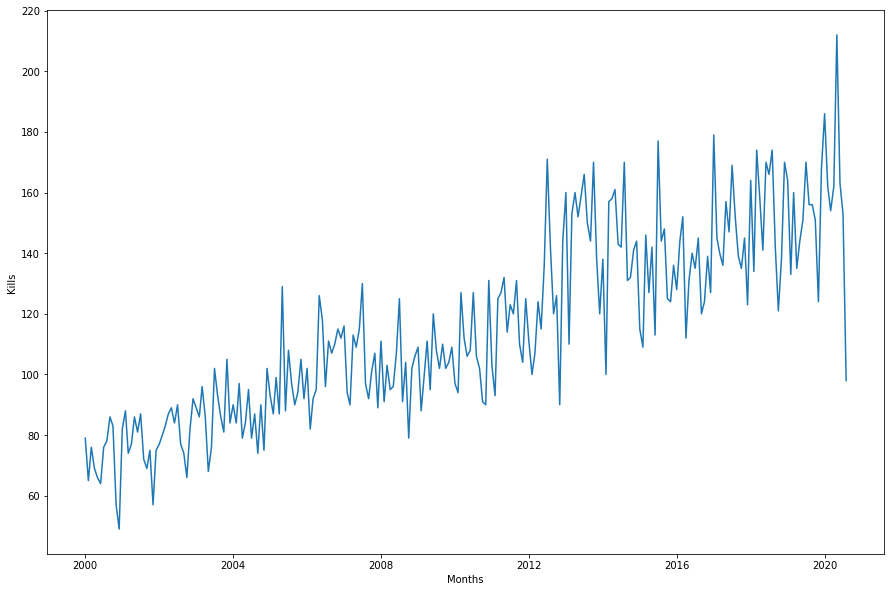

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel('Months')
plt.ylabel('Kills')
plt.plot(monthlydf_value_counts)
plt.show()


# Testing for Stationarity

This is the most important part of our notebook because from the results we obtain here out whole notebook will be changed based on this. Here we will be testing whether our data is stationay or not. We will check it by using Augmented Dicky Fuller test, which will check whether there is an evidence of null Hypothesis(**stationary data**) or not. Null Hypothesis will be checked on the basis of p-value. If p-value is found to be less than or equal to 0.05 than we can say that we have a strong evidence of null hypothesis otherwise the data is said to be non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
# importing the adfuller library from statsmodels 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(monthlydf_value_counts['Kills'])
# Storing all the values of the adfuller in test_result

In [ ]:
def adfuller_test(kills):
    result=adfuller(kills)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

# If H0 then it is not stationary
# If H1 then it is stationary

In [ ]:
adfuller_test(monthlydf_value_counts['Kills'])

ADF Test Statistic : -0.9106441120838679
p-value : 0.7844469516526447
#Lags Used : 11
Number of Observations Used : 236
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Here we just have to look at the p-value for now. The p-value is greater than 0.05. So the data is not stationary.

# Implementing ARIMA Model

For non-stationary data ARIMA model is often the best choice. So will try to fit the data on ARIMA model. Arima is the abbreviated version of Automated Regression Integrated Moving Average.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# importing arima from statsmodel again

In [ ]:
model=ARIMA(monthlydf_value_counts['Kills'],order=(1,1,1))
model_fit=model.fit()
# Here I am fitting the model using the order (1,1,1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In simple terms we can compare p,q and d with some hyperparamters like we use in normal models like C and Gamma. But here p is the number of **autoregressive terms**, d is the number of **nonseasonal differences** needed for stationarity, and. q is the **number of lagged forecast** errors in the prediction equation.


Further in this notebook there is also an explanation on how to choose the value of P and Q

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Kills   No. Observations:                  247
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1029.921
Method:                       css-mle   S.D. of innovations             15.594
Date:                Wed, 01 Dec 2021   AIC                           2067.842
Time:                        02:27:31   BIC                           2081.880
Sample:                    02-01-2000   HQIC                          2073.494
                         - 08-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3535      0.073      4.820      0.000       0.210       0.497
ar.L1.D.Kills     0.1261      0.080      1.569      0.118      -0.031       0.284
ma.L1.D.Kills    -0.9397      0.042    -22.172      0.000      -1.023      -0.857
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.9299           +0.0000j            7.9299            0.0000
MA.1            1.0641           +0.0000j            1.0641            0.0000
-----------------------------------------------------------------------------
"""

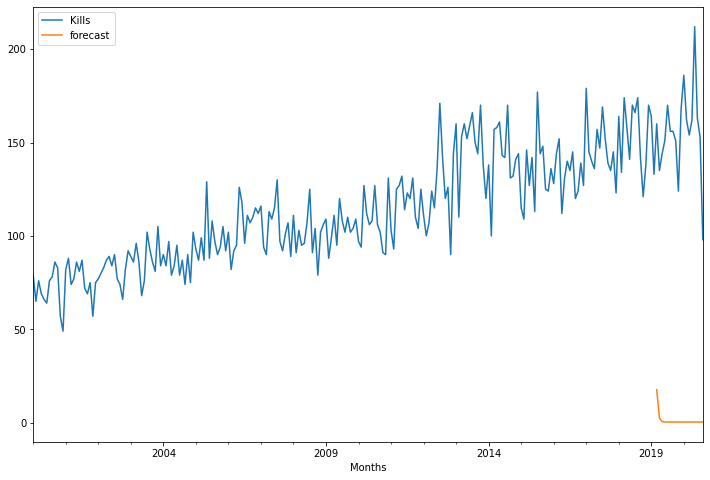

In [ ]:
monthlydf_value_counts['forecast']=model_fit.predict(start=230,end=247,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

Before moving on the future predciton we have to make sure that our model is working fine on our dataset. If it's not working fine than we might need to make our model stationary or we need to need to make some changes with the values of p.q and d. Further imputations are discussed in the notebook.

Form the above prediction result we can see that our model is not at all working fine while we are trying to predcit our model for the last 18 months.
So we have to try a different appraoch.

# Implementation for Seasonal Data with SARIMAX

In [ ]:
import statsmodels.api as sm
# Importing the library for seasonal Arima

In [ ]:
model_1=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Kills'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_1.fit()

# Here I  am adding a seasonal order of 12. Wherein a parameter names seasonal order will be defined ans under that p,q and d values are 1,1 and 1 respectively.
# And under that the seasonal term is set to 12 which I will explain by making a seperate column of seasonal difference ifurther in this notebook.
# It can be said that seasonal term is like a normalization technique which we use in normal models. We are normalizaing our data to overcome the huge..
# .. differences betweent the values.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


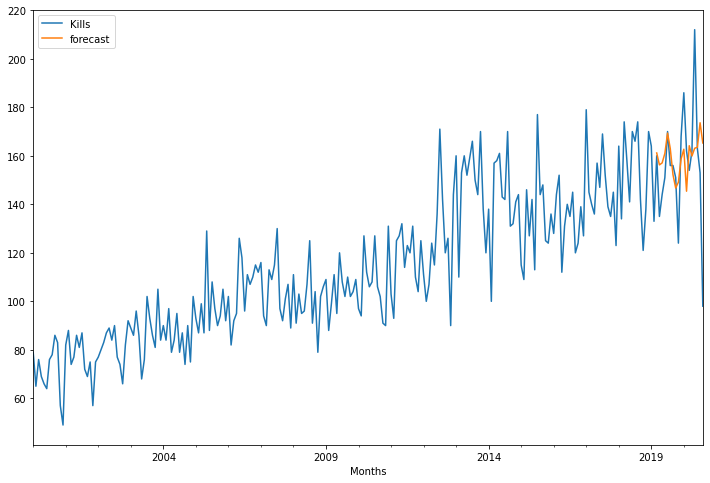

In [ ]:
monthlydf_value_counts['forecast']=results.predict(start=230,end=247,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

Now I am predicitng the values for the last 18 months on our own dataset to make sure that it is performin well. The orange line is the predcition result. By comparing the result with ARIMA model it can be said that this results are much better.

# Trial 1 with different Seasonal Term


In [ ]:
model_2=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Kills'],order=(1, 1, 1),seasonal_order=(1,1,1,3))
results_2=model_2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


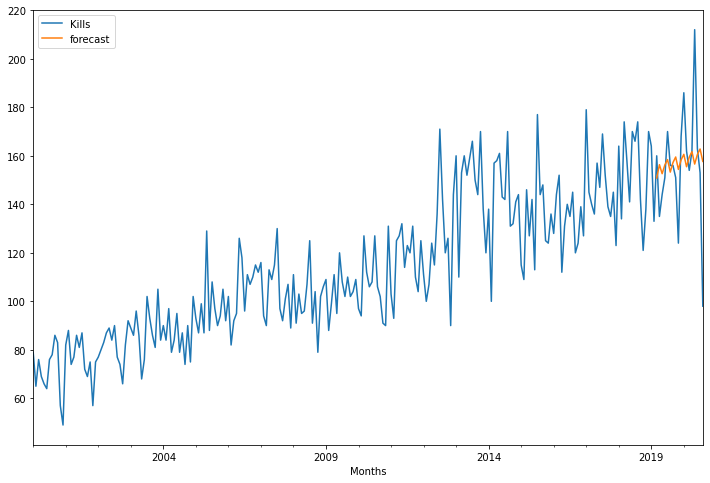

In [ ]:
monthlydf_value_counts['forecast']=results_2.predict(start=230,end=247,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

# Trial 2 with different Seasonal Term

In [ ]:
model_3=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Kills'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_3=model_3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


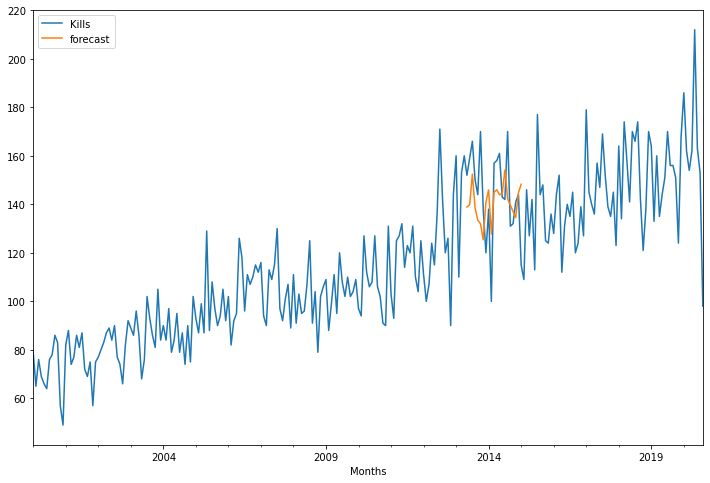

In [ ]:
monthlydf_value_counts['forecast']=results_3.predict(start=160,end=180,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

Just to make sure that our model is performing well on different values of months I am predicting the kills on sonme random moth values which in in between and it can be seen from the results that it is in that same range eventhough it is not that accurate. Anyways time series can never be 100% accurate.

# Trail 3 with different different value for Seasonal Term

In [ ]:
model_4=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Kills'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results_4=model_4.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


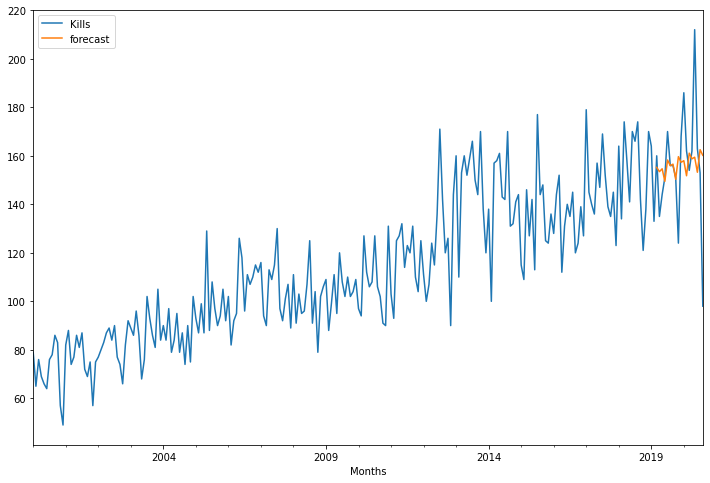

In [ ]:
monthlydf_value_counts['forecast']=results_4.predict(start=230,end=247,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

The prediction results are almost the same as we were obtaining when we used the seaonal term as 3. So we will again try a different seasonal term.

# Trial 4 with different values for Seasonal Term

In [ ]:
model_5=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Kills'],order=(1, 1, 1),seasonal_order=(1,1,1,6))
results_5=model_5.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


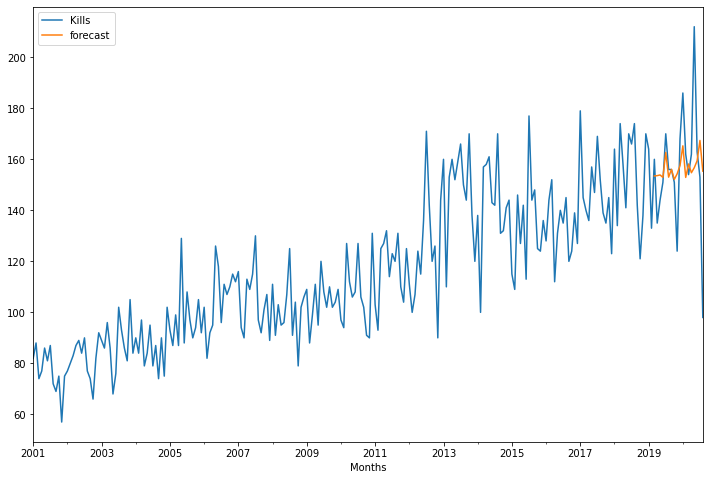

In [ ]:
monthlydf_value_counts['forecast']=results_5.predict(start=230,end=247,dynamic=True)
monthlydf_value_counts[['Kills','forecast']].plot(figsize=(12,8))

Here we can observe some difference when using the seasonal term as 6. Wherever there is a peak in the actual graph the prediction results are succesfully getting the peak too. Not as high as the actual results but all we need is a direction for now and we are getting that.

# Note On Seasonal Term

After trying the following seasonal terms:


*   3 - the peaks were not detected and the predictions were similar every three months
*   4 - alomst the same as the seasonal term of 3 with just some variations
*   6 - Peaks were detected but still the results were not that appealing
*   12 - In this the peaks were detected and the predition graph was changing with the actual values. Eventhough the values were not exact, but still it was way better than any other seasonal term.



# Predciting on Future

For predicitng on future we need to make a list of dates first. As we have thought of forecasting for the next two years. We will need the list of date that starts form the ending index of our dataframe and extends till the next 24 months. 

For doing this we will be using DateOffset library from pandas.tseries.offsets to get the list of dates from the ending index to the next 24 months

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[monthlydf_value_counts.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_dates

[Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

Above are the list of dates for the 24 months which will be used for future forecasting

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

# Joining those dates with already exisitng dates so that we can do forecating on that in a dataframe

In [ ]:
future_df=pd.concat([monthlydf_value_counts,future_datest_df])

In [ ]:
future_df

,Kills,forecast,Unique ID,Subject's name,Subject's age,Subject's gender,Subject's race,Subject's race with imputations,Imputation probability,URL of image of deceased,Date of injury resulting in death (month/day/year),Location of injury (address),Location of death (city),Location of death (state),Location of death (zip code),Location of death (county),Full Address,Latitude,Longitude,Agency responsible for death,Cause of death,A brief description of the circumstances surrounding the death,"Dispositions/Exclusions INTERNAL USE, NOT FOR ANALYSIS",Intentional Use of Force (Developing),Link to news article or photo of official document,"Symptoms of mental illness? INTERNAL USE, NOT FOR ANALYSIS",Video,Date&Description,Unique ID formula,Unique identifier (redundant),Date (Year)
2000-01-01,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


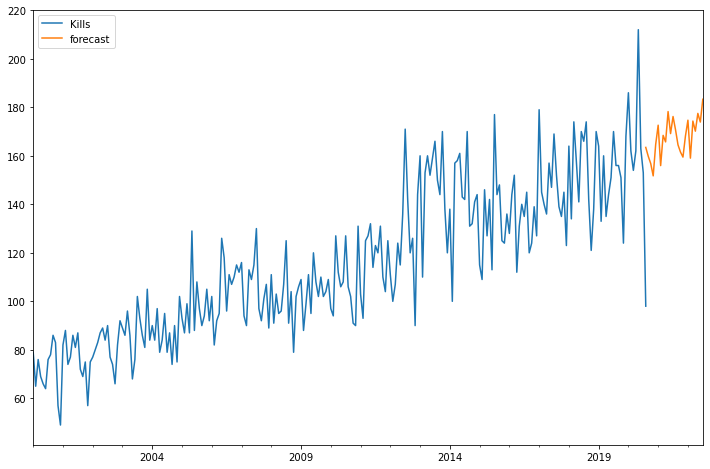

In [ ]:
future_df['forecast'] = results.predict(start = 247, end = 271, dynamic= True)  
future_df[['Kills', 'forecast']].plot(figsize=(12, 8)) 

AS seen from the figure the orange line is the future prediction for the number of kills that might happen for the next 24 months

# Trying Differencing for Better Results

This is the part where I explain the things that are happening backend when we use the seasonal term of 12 in our seasonal order. I will explain this by making an entire new column for Seasonal first difference. For making a new column of Seasonal First Differnece we need to make a shift of 12.

In [ ]:
monthlydf_value_counts['Seasonal First Difference']=monthlydf_value_counts['Kills']-monthlydf_value_counts['Kills'].shift(12)

In [ ]:
monthlydf_value_counts.head(20)

,Kills,forecast,Seasonal First Difference
Months,,,
2000-01-01,79,NaN,NaN
2000-02-01,65,NaN,NaN
2000-03-01,76,NaN,NaN
2000-04-01,69,NaN,NaN
2000-05-01,66,NaN,NaN
2000-06-01,64,NaN,NaN
2000-07-01,76,NaN,NaN
2000-08-01,78,NaN,NaN
2000-09-01,86,NaN,NaN


As seen above we are performign the shift of 12 and getting the values as seen in the column of seasonal first differencce. With NAN values for the first 12 rows because we just performed a shift of 12. AS seen the values have changed for each row in such as way so as to make the data stationary.

In [ ]:
adfuller_test(monthlydf_value_counts['Seasonal First Difference'].dropna())

ADF Test Statistic : -5.233957500327184
p-value : 7.491890957425694e-06
#Lags Used : 11
Number of Observations Used : 224
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


To check whether seasonal difference has actually made our data stationary or not. We have to perform the Augmented Dickey fuller test and check whether the p-value is less than or equal to 0.05. From the above results it can be seen that p-value is less than 0.05. So there is no null hypothesis and the data is found to be stationary.

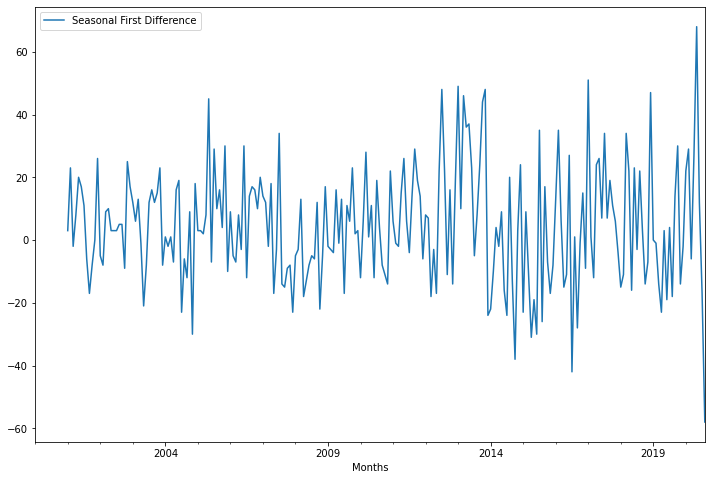

In [ ]:
monthlydf_value_counts[['Seasonal First Difference']].plot(figsize=(12,8))

By plotting the seasonal differnece graph we can see that the graph is stationary and that is why the prediciton with seasonal term of 12 is becoming easy.

# Auto Correlation and Partial Correlation

The Auto Correlation and Partial Correlation plot will give us the why we chose the values of p and q by plotting it from Auto Correlation and Partial Correaltion plot.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Here I am importing plot_acf anf plot_pacf for auto correlation plot respectively

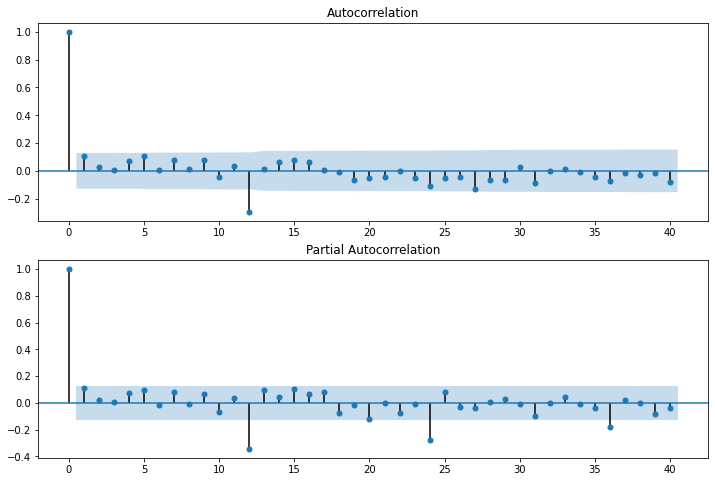

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(monthlydf_value_counts['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(monthlydf_value_counts['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

From the Auto Correlation plot we can figure out the p(autoregressive terms) value. Now we have to select the p value such that it touches the highlighted portion or it goes out of the highlightes portion. From this the  the value of p value will be the index value of the line that is touching the highlighted portion.

Same thing goes for the Partial Correlation plot but here we will be taking q(number of lagged forecast errors) value.

The value of d (number of non seasonal differences) should be chosen based on our own intuition. So I am keeping it 1 because it seems to be giving good results.

# Input Different values of d while keeping the values of p, q and seasonal term as 1,1 and 12 respectively

# Trial with d = 0

In [ ]:
model_6=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Seasonal First Difference'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
results_6=model_6.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


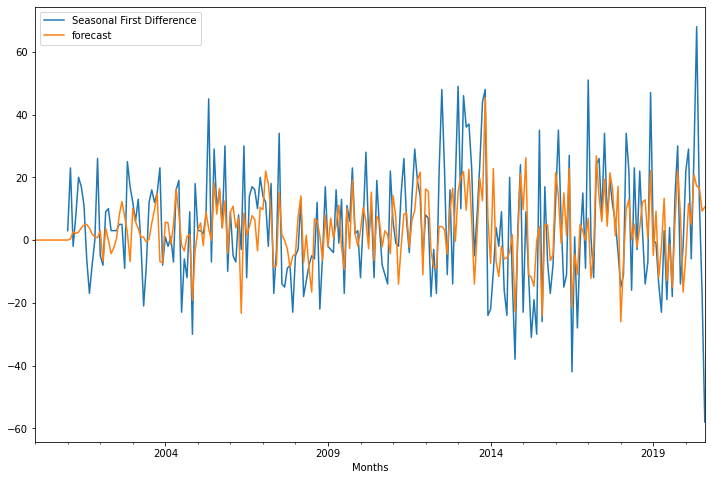

In [ ]:
monthlydf_value_counts['forecast']=results_6.predict(dynamic=False)
monthlydf_value_counts[['Seasonal First Difference','forecast']].plot(figsize=(12,8))

# Trial d = 1

In [ ]:
model_7=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Seasonal First Difference'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_7=model_7.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


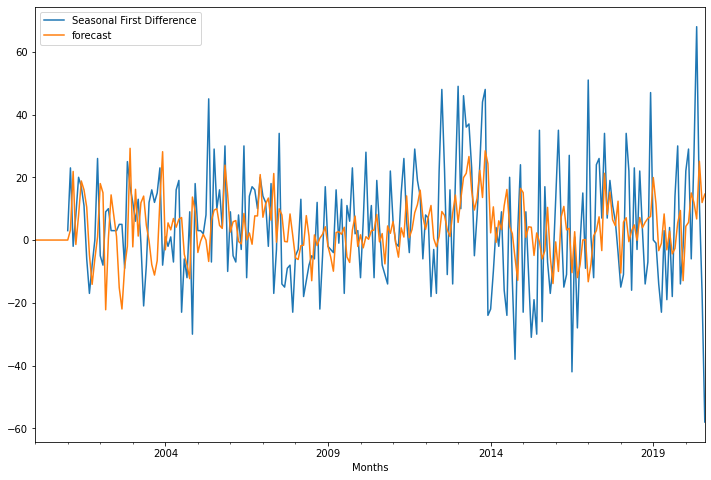

In [ ]:
monthlydf_value_counts['forecast']=results_7.predict(dynamic=False)
monthlydf_value_counts[['Seasonal First Difference','forecast']].plot(figsize=(12,8))

# Trial d = 2

In [ ]:
model_8=sm.tsa.statespace.SARIMAX(monthlydf_value_counts['Seasonal First Difference'],order=(1, 2, 1),seasonal_order=(1,2,1,12))
results_8=model_8.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


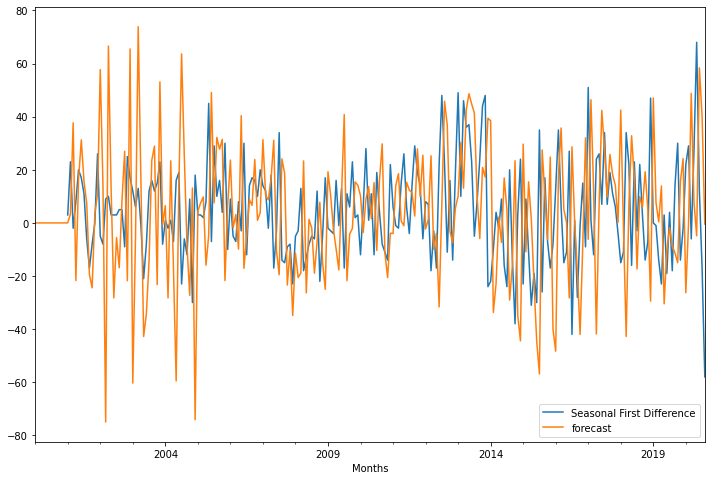

In [ ]:
monthlydf_value_counts['forecast']=results_8.predict(dynamic=False)
monthlydf_value_counts[['Seasonal First Difference','forecast']].plot(figsize=(12,8))

# Note for d(number of non seasonal differences) value

The values of d we used are as follows


*   d = 0 : is in the range of the actual results but not able to identify the peaks properly
*   d = 1 : is able to identify peaks when compared to d = 0
*   d = 2 : the peaks are identified but the values of predictions are way higher than the actual values.

So to conclude this, it seems that the value of d = 1 is giving better results than d=0 and d=2. So we will be moving forward with d = 1 values.





# Accuracy

In [ ]:
monthlydf_value_counts.dropna()

,Kills,forecast,Seasonal First Difference
Months,,,
2001-01-01,82,0.000000,3.0
2001-02-01,88,3.438362,23.0
2001-03-01,74,37.681549,-2.0
2001-04-01,77,-21.709118,8.0
2001-05-01,86,16.580250,20.0
...,...,...,...
2020-04-01,162,7.891727,27.0
2020-05-01,212,-4.864379,68.0
2020-06-01,163,58.368902,12.0


In [ ]:
monthlydf_value_counts = monthlydf_value_counts.dropna()

Text(0.5, 1.0, 'RMSE: 77.8493')

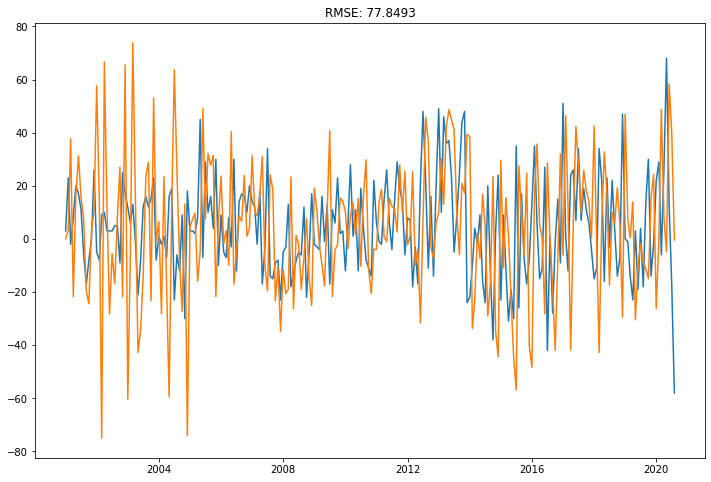

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA = monthlydf_value_counts['forecast']
actual = monthlydf_value_counts['Seasonal First Difference']
plt.plot(monthlydf_value_counts['Seasonal First Difference'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-actual)**2)/len(monthly_df))  )

Here from the above figure it can be seen that I have plotted the entire predicition on our actual results to get the entire overview of our model and on top of that I have even made sur to print the RMSE(Root Mean Squared Error) i.e the accuracy of the model on the entire data rather than getting the accuracy on just some indexes. We have obtained an accuracy of **77.85%**

# Trials for converting to weekly data

In [ ]:
df_copy['date'].resample('W')

TypeError: ignored

In [ ]:
df_copy['week_of_year']

0       2000-01-01
1       2000-01-01
2       2000-01-01
3       2000-01-01
4       2000-01-02
           ...    
28597   2020-08-17
28598   2020-08-17
28599   2020-08-17
28600   2020-08-18
28601   2020-08-18
Name: week_of_year, Length: 28602, dtype: datetime64[ns]

In [ ]:
df_copy['day_of_year'] = df_copy['date'].apply(lambda x: x.dayofyear)
df_copy['week_no'] = df_copy['date'].apply(lambda x: x.weekofyear)

In [ ]:
df_copy

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age,month_year,day_of_year,week_no
0,17.0,Male,European-American/White,Not imputed,2000-01-01,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.0,2000-01,1,52
1,21.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.0,2000-01,1,52
2,19.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.0,2000-01,1,52
3,23.0,Male,Hispanic/Latino,Not imputed,2000-01-01,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.0,2000-01,1,52
4,24.0,Female,African-American/Black,Not imputed,2000-01-02,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.0,2000-01,2,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28597,36.0,Male,Hispanic/Latino,Not imputed,2020-08-17,San Bernardino,CA,San Bernardino,34.120414,-117.298659,Gunshot,Intentional use of deadly force,No,2020,36.0,2020-08,230,34
28598,44.0,Male,European-American/White,Not imputed,2020-08-17,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020,44.0,2020-08,230,34
28599,47.0,Female,European-American/White,Not imputed,2020-08-17,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020,47.0,2020-08,230,34
28600,14.0,Male,African-American/Black,Not imputed,2020-08-18,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020,14.0,2020-08,231,34


In [ ]:
df_copy['date'] = df_copy['date'].astype(str)
df_copy['year'] = df_copy['year'].astype(str)
df_copy['week_no'] = df_copy['week_no'].astype(str)

In [ ]:
df_copy['date']

0        2000-01-01
1        2000-01-01
2        2000-01-01
3        2000-01-01
4        2000-01-02
            ...    
28597    2020-08-17
28598    2020-08-17
28599    2020-08-17
28600    2020-08-18
28601    2020-08-18
Name: date, Length: 28602, dtype: object

In [ ]:
df_copy['year']

0        2000
1        2000
2        2000
3        2000
4        2000
         ... 
28597    2020
28598    2020
28599    2020
28600    2020
28601    2020
Name: year, Length: 28602, dtype: object

In [ ]:
df_copy['week_no']

0        52
1        52
2        52
3        52
4        52
         ..
28597    34
28598    34
28599    34
28600    34
28601    34
Name: week_no, Length: 28602, dtype: object

In [ ]:
df_copy['week_of_year']=pd.to_datetime(df_copy['year']+'-'+df_copy['week_no'])

ParserError: ignored

In [ ]:
df_copy

,age,gender,race,imp_prob,date,city,state,county,Latitude,Longitude,cause,force_used,mental_illness,year,mean_age,month_year,day_of_year,week_no,week_of_year
0,17.0,Male,European-American/White,Not imputed,2000-01-01,Willits,CA,Mendocino,39.470883,-123.361751,Vehicle,Pursuit,No,2000,17.0,2000-01,1,52,2000-52
1,21.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,21.0,2000-01,1,52,2000-52
2,19.0,Male,African-American/Black,Not imputed,2000-01-01,Detroit,MI,Wayne,42.404526,-83.092274,Vehicle,Pursuit,No,2000,19.0,2000-01,1,52,2000-52
3,23.0,Male,Hispanic/Latino,Not imputed,2000-01-01,Carlsbad,NM,Eddy,32.450080,-104.237643,Vehicle,Pursuit,No,2000,23.0,2000-01,1,52,2000-52
4,24.0,Female,African-American/Black,Not imputed,2000-01-02,Sacramento,CA,Sacramento,38.473949,-121.433776,Vehicle,Pursuit,No,2000,24.0,2000-01,2,52,2000-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28597,36.0,Male,Hispanic/Latino,Not imputed,2020-08-17,San Bernardino,CA,San Bernardino,34.120414,-117.298659,Gunshot,Intentional use of deadly force,No,2020,36.0,2020-08,230,34,2020-34
28598,44.0,Male,European-American/White,Not imputed,2020-08-17,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,Suicide,No,2020,44.0,2020-08,230,34,2020-34
28599,47.0,Female,European-American/White,Not imputed,2020-08-17,Blaine,MN,Anoka,45.188123,-93.254570,Gunshot,No,No,2020,47.0,2020-08,230,34,2020-34
28600,14.0,Male,African-American/Black,Not imputed,2020-08-18,Winston-Salem,NC,Forsyth,36.105468,-80.241174,Vehicle,Pursuit,No,2020,14.0,2020-08,231,34,2020-34


In [ ]:
weekofyear_df = pd.DataFrame(df_copy['week_of_year'].value_counts())

In [ ]:
weekofyeardf_value_counts = weekofyear_df.reset_index()

In [ ]:
weekofyeardf_value_counts

,index,week_of_year
0,2020-22,59
1,2018-1,56
2,2019-1,54
3,2017-27,51
4,2020-23,50
...,...,...
1075,2002-25,8
1076,2010-53,8
1077,2000-21,7
1078,2016-53,7


In [ ]:
weekofyeardf_value_counts.columns = ['week_of_year','Kills']

In [ ]:
weekofyeardf_value_counts.sort_values(weekofyeardf_value_counts['week_of_year'])

KeyError: ignored

In [ ]:
weekofyeardf_value_counts['week_of_year'] = pd.to_datetime(weekofyeardf_value_counts['week_of_year'], format='%U%W')

ValueError: ignored